In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('../data/cars_clean.csv')
display(df.head())

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


Sanity Checks

In [3]:
df.shape

(201, 27)

In [4]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,58.167861,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,0.000000,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,50.000000,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,100.000000,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,150.000000,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,200.000000,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df[['length','width','curb-weight','engine-size']].corr()

,length,width,curb-weight,engine-size
length,1.000000,0.857170,0.880665,0.685025
width,0.857170,1.000000,0.866201,0.729436
curb-weight,0.880665,0.866201,1.000000,0.849072
engine-size,0.685025,0.729436,0.849072,1.000000


In [6]:
df.corr(numeric_only=True)

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155


<Axes: xlabel='price', ylabel='horsepower'>

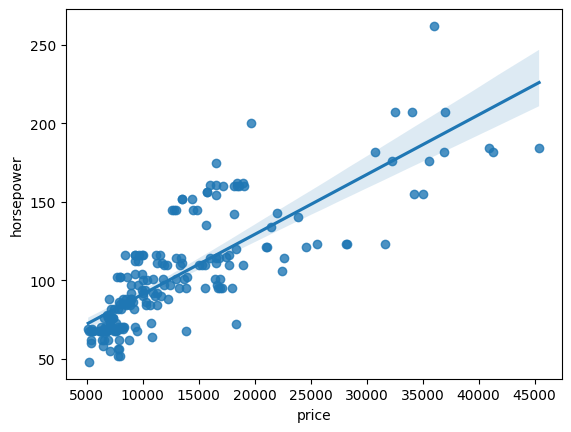

In [7]:
sns.regplot(x='price', y='horsepower', data=df)

<Axes: xlabel='body-style', ylabel='price'>

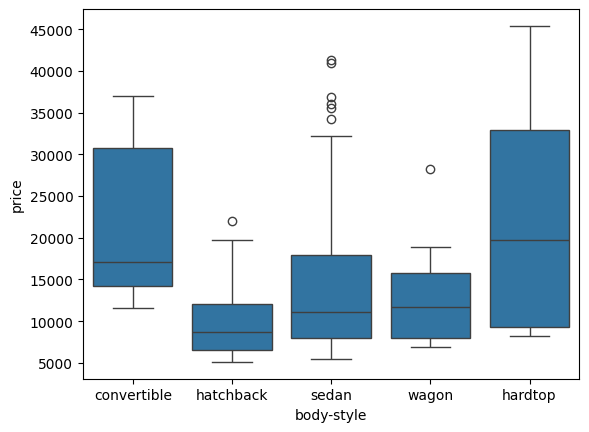

In [8]:
sns.boxplot(x='body-style', y='price', data=df)

<Axes: xlabel='body-style', ylabel='count'>

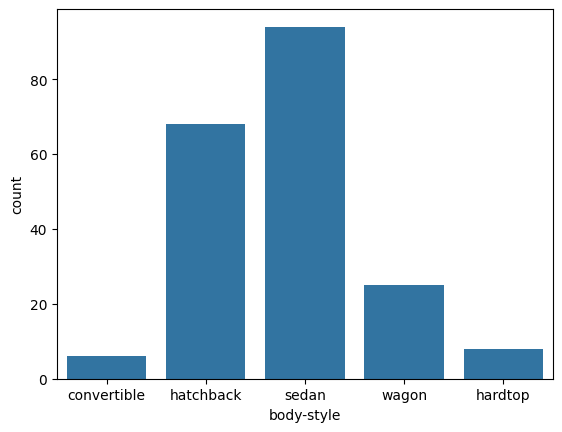

In [9]:
sns.countplot(x='body-style', data=df)

<Axes: xlabel='price', ylabel='make'>

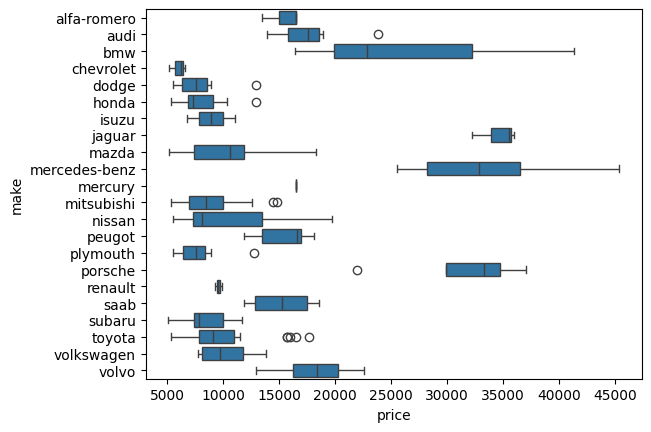

In [10]:
sns.boxplot(x='price', y='make', data=df)

In [11]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [12]:
data_drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
data_drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
data_drive_wheels_counts.index.name = 'drive-wheels'
data_drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [13]:
group_1 = df[['make','price']]
group_1
grouped_mean_1 = group_1.groupby(['make'], as_index=False).mean()
grouped_mean_1

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444
5,honda,8184.692308
6,isuzu,8916.500000
7,jaguar,34600.000000
8,mazda,10652.882353
9,mercedes-benz,33647.000000


In [14]:
group_2 = df[['drive-wheels','engine-location','price']]
grouped_mean_2 = group_2.groupby(['drive-wheels', 'engine-location'], as_index=False).mean()
grouped_mean_2

,drive-wheels,engine-location,price
0,4wd,front,10241.000000
1,fwd,front,9244.779661
2,rwd,front,19142.180556
3,rwd,rear,34528.000000


In [15]:
grouped_pivot_1 = grouped_mean_2.pivot(index='drive-wheels', columns='engine-location')
grouped_pivot_1.fillna(0, inplace=True)
grouped_pivot_1

price         
engine-location         front     rear
drive-wheels                          
4wd              10241.000000      0.0
fwd               9244.779661      0.0
rwd              19142.180556  34528.0

In [16]:
grouped_pivot_2 = grouped_mean_2.pivot(index='engine-location', columns='drive-wheels')
grouped_pivot_2.fillna(0, inplace=True)
grouped_pivot_2

price                           
drive-wheels         4wd          fwd           rwd
engine-location                                    
front            10241.0  9244.779661  19142.180556
rear                 0.0     0.000000  34528.000000

In [17]:
# The p-value is the probability of obtaining results at
# least as extreme as the observed results, assuming the null hypothesis is true.

# P-Value < 0.001: Strong Evidence that correlation coefficient is statisticallly significant
# P-Value < 0.05: Moderate Evidence that correlation coefficient is statisticallly significant
# P-Value < 0.1: Weak Evidence that correlation coefficient is statisticallly significant
# P-Value > 0.1: No Evidence that correlation coefficient is statisticallly significant

In [ ]:
%pip install scipy
%pip install altair
%pip install plotly


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/731.2 kB ? eta -:--:--Requirement already satisfied: MarkupSafe>=2.0 in /home/codespace/.local/lib/python3.12/site-packages (from jinja2->altair) (3.0.2)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 20.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of

In [19]:
from scipy import stats
import pandas as pd
p_coef, p_val = stats.pearsonr(df['engine-size'], df['price'])
p_val

np.float64(9.265491622198827e-64)

Analysis of Variance (ANOVA)
- Statistical Method to Test whether there are Significant Differences between the Means of Two or More Groups
- ANOVA returns two parameters
    1.   F-test score
    2.   P-Value
- Price Strongly Correlated with Variable that we are analyzing then we expect the ANOVA to return a large F-Test score and a small P-Value.



In [20]:
group_2

,drive-wheels,engine-location,price
0,rwd,front,13495
1,rwd,front,16500
2,rwd,front,16500
3,fwd,front,13950
4,4wd,front,17450
...,...,...,...
196,rwd,front,16845
197,rwd,front,19045
198,rwd,front,21485
199,rwd,front,22470


In [21]:
group_3 = group_2[['drive-wheels', 'price']].groupby(['drive-wheels'], as_index=False).mean()
group_3

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [22]:
group_3_4wd = group_3[group_3['drive-wheels'] == '4wd']['price']
display(group_3_4wd)

0    10241.0
Name: price, dtype: float64

In [23]:
f_val, p_val = stats.f_oneway(
  group_3[group_3['drive-wheels'] == 'fwd']['price'],
  group_3[group_3['drive-wheels'] == '4wd']['price'],
  group_3[group_3['drive-wheels'] == 'rwd']['price'])

f_val, p_val

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipykernel_5978/8628522.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = stats.f_oneway(


(np.float64(nan), np.float64(nan))

Linear Regression Model
y = a + b * x

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [25]:
X = df[['engine-size']]
Y = df['price']
lm.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


price = -7983 + 167 * engine-size

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

lm.fit(X_train, Y_train)
y_pred = lm.predict(X_test)

# Evaluate the model using appropriate regression metrics
print("R2 Score:", r2_score(Y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred))

R2 Score: 0.6887892619732785
Mean Squared Error: 15446938.69133433


(0.0, 53509.64662432029)

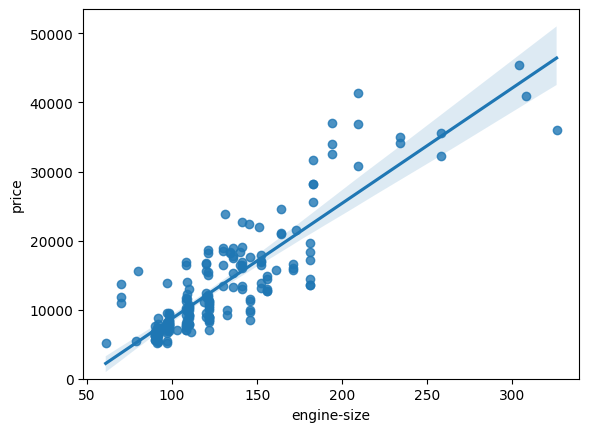

In [27]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

<Axes: xlabel='engine-size', ylabel='price'>

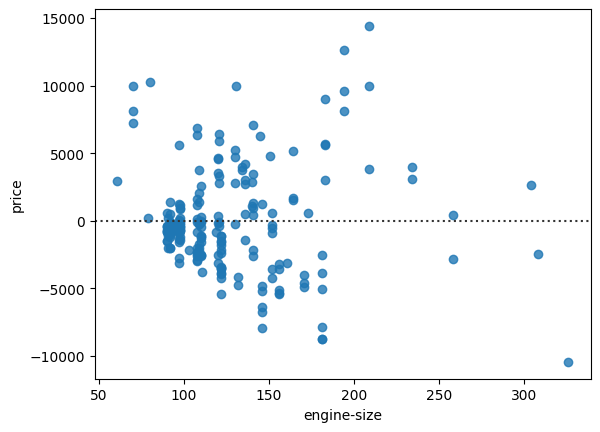

In [28]:
sns.residplot(x='engine-size', y='price', data=df)

In [29]:
lm.score(X, Y)

0.7609548326949442

Mulitple Linear Regression

In [30]:
z = df[['curb-weight', 'engine-size']]
lm.fit(z, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
lm.score(z, Y)

0.7924548499107636

In [32]:
lm.intercept_

np.float64(-14229.717252628689)

In [33]:
lm.coef_
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

Multiple Linear Regression Model

price = -14230 + 112 * engine-size + 5 * curb-weight

In [34]:
z = df[['curb-weight', 'engine-size', 'horsepower']]
lm.fit(z, Y)
p_coef, p_val = stats.pearsonr(df['horsepower'], df['price'])
p_val

np.float64(6.369057428259571e-48)

In [35]:
lm.score(z, Y)


0.8091263794284136

In [36]:
print('Coef: ', lm.coef_, " Intecept:", lm.intercept_)

Coef:  [ 4.40171374 83.86510939 49.27955442]  Intecept: -13778.400282075316


Higher P-Value, Lower R^2 coefficient of determination

In [37]:
z = df[['curb-weight', 'engine-size', 'engine-size']]
lm.fit(z, Y)
p_coef, p_val = stats.pearsonr(df['engine-size'], df['price'])
p_val

np.float64(9.265491622198827e-64)

In [38]:
lm.score(z, Y)

0.7924548499107638

In [39]:
print('Coef: ', lm.coef_, " Intecept:", lm.intercept_)

Coef:  [ 5.16018181 56.1539788  56.1539788 ]  Intecept: -14229.717252628692


Fit Quadratic Model

In [40]:
def PlotPoly(model, x, y, Name):
  x_new = np.linspace(1400, 5000, 1000)
  y_new = model(x_new)

  plt.plot(x, y, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit for Price ~ Engine Size')
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  plt.xlabel(Name)
  plt.ylabel('Price')
  plt.show()

          3            2
6.22e-07 x - 0.001546 x + 6.871 x - 5555


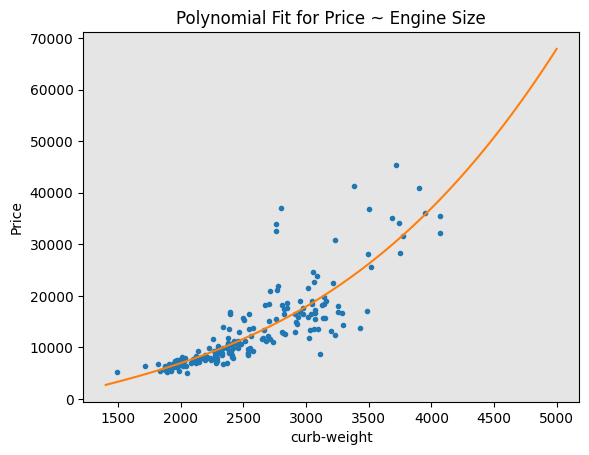

In [41]:
x = df['curb-weight']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPoly(p, x, y, 'curb-weight')